In [274]:
#泰坦尼克预测

import numpy as np 
import pandas as pd 
    
import os
print(os.listdir("./input"))

#展示输入文件

['train.csv']



##        输入想要的文件，trian.csv

In [275]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#导入机器学习包

In [276]:
titanic = pd.read_csv("./input/train.csv")

titanic.head()

# PassengerId	旅客ID，这条数据应该没啥用
# Survived：是否活下来了 1:yes  0:no
# Pclass 旅客等级 1 2 3 分别代表不同的等级	 
# Name	名字 
# Sex	 性别	 
# Age	 年龄	 
# SibSp	有多少兄弟姐妹/配偶同船
# Parch	有多少父母/子女同船
# Ticket	船票号码，无用数据
# Fare	 船票收费	 
# Cabin	 所在小屋	 
# Embarked	登船城市C Q S 分别代表不同的城市
# #数据展开

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [277]:

type(test)

pandas.core.frame.DataFrame

In [278]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

#不同等级旅客生还概率

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [279]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

#不同性别旅客生还概率，女性高于男性

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [280]:
    #填补age缺失

titanic["Age"]= titanic["Age"].fillna(titanic["Age"].mean())


In [281]:
titanic['Age'].mean()

#乘客年龄均值

29.69911764705882

In [282]:
titanic.info()
#训练集文件信息，891个数据


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [283]:
y = titanic['Survived']

y.head()

#设置分类指标


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [284]:

titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

In [285]:


x = titanic[['Pclass', 'Age', 'Sex','SibSp','Parch','Ticket','Fare','Embarked']]

#船舱，年龄，性别等等，892条数据，删除小屋数据与搭乘港口数据，因为数据缺失又很难插值
#设置需要考虑的特征，查看是否具有缺失值

x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Age         891 non-null float64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [286]:

type(x)

pandas.core.frame.DataFrame

In [287]:

titanic.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [288]:

titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')


##检查数据空缺情况



In [289]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
import pandas as pd


In [290]:


x = titanic[['Pclass', 'Age', 'Sex','SibSp','Parch','Ticket','Fare','Embarked']]

#船舱，年龄，性别等等，892条数据，删除小屋数据与搭乘港口数据，因为数据缺失又很难插值
#设置需要考虑的特征，查看是否具有缺失值

x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Age         891 non-null float64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [291]:

type(x)

pandas.core.frame.DataFrame


##独热编码

In [292]:


from sklearn.feature_extraction import DictVectorizer  
x_dict_list = x.to_dict(orient='records')
print("*" * 30 + " train_dict " + "*" * 30)
print(pd.Series(x_dict_list[:5]))

dict_vec = DictVectorizer(sparse=False)
x = dict_vec.fit_transform(x_dict_list)
print("*" * 30 + " onehot编码 " + "*" * 30)
print(dict_vec.get_feature_names())
#print(x[:5])
#特征抽取 - onehot编码
  
#x.head()

#方便进行属性值的选择，特征投影

#DictVectorizer的处理对象是符号化(非数字化)的但是具有一定结构的特征数据，如字典等，将符号转成数字0/1表示

****************************** train_dict ******************************
0    {'Pclass': 3, 'Age': 22.0, 'Sex': 'male', 'Sib...
1    {'Pclass': 1, 'Age': 38.0, 'Sex': 'female', 'S...
2    {'Pclass': 3, 'Age': 26.0, 'Sex': 'female', 'S...
3    {'Pclass': 1, 'Age': 35.0, 'Sex': 'female', 'S...
4    {'Pclass': 3, 'Age': 35.0, 'Sex': 'male', 'Sib...
dtype: object
****************************** onehot编码 ******************************
['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp', 'Ticket=110152', 'Ticket=110413', 'Ticket=110465', 'Ticket=110564', 'Ticket=110813', 'Ticket=111240', 'Ticket=111320', 'Ticket=111361', 'Ticket=111369', 'Ticket=111426', 'Ticket=111427', 'Ticket=111428', 'Ticket=112050', 'Ticket=112052', 'Ticket=112053', 'Ticket=112058', 'Ticket=112059', 'Ticket=112277', 'Ticket=112379', 'Ticket=113028', 'Ticket=113043', 'Ticket=113050', 'Ticket=113051', 'Ticket=113055', 'Ticket=113056', 'Ticket=113059', 'Ticket=11350


在建模过程中，我们通常会碰到各种类型的属性，如果是标称型属性，也就是不具备序列性、不能比较大小的属性，通常我们不能用简单的数值来粗暴替换。因为属性的数值大小会影响到权重矩阵的计算，不存在大小关系的属性，其权重也不应该发生相应的变化，那么我们就需要用到One-hot编码（也有人称独热编码）这种特殊的编码方式了。

In [293]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



##划分训练集和测试集

In [294]:

type(y)

pandas.core.series.Series


##划分结果后，开始进行决策树预测与随机森林的参数选择

In [295]:

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

print("*" * 30 + " 准确率 " + "*" * 30)
print(dec_tree.score(x_test, y_test))

****************************** 准确率 ******************************
0.8156424581005587


In [247]:
import time
#from sklearn.grid_search import GridSearchCV
#gridsearchcv自动调参


# n_jobs: -1表示设置为核心数量
# n_estimators: 决策树数目
# max_depth: 树最大深度

rf = RandomForestClassifier(n_jobs=-1)
param = {
    "n_estimators": [120, 200, 300, 500, 800, 1200],
    "max_depth": [5, 8, 15, 25, 30]
}
# 2折交叉验证
search = sklearn.model_selection.GridSearchCV(rf, param_grid=param, cv=2)
print("*" * 30 + " 超参数网格搜索 " + "*" * 30)

start_time = time.time()
search.fit(x_train, y_train)
print("耗时：{}".format(time.time() - start_time))


print("最优参数：{}".format(search.best_params_))

print("*" * 30 + " 准确率 " + "*" * 30)
print(search.score(x_test, y_test))

****************************** 超参数网格搜索 ******************************
耗时：125.43527293205261
最优参数：{'max_depth': 30, 'n_estimators': 300}
****************************** 准确率 ******************************
0.8212290502793296



##1 超参数网格搜索的最优参数

#2 在2，8划分的测试数据集中，准确率达到了82%

#3 相较于单个决策树的78%准确率有了较大提升

#4 下面进行数据可视化的一些工作


g:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
g:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
g:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
g:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


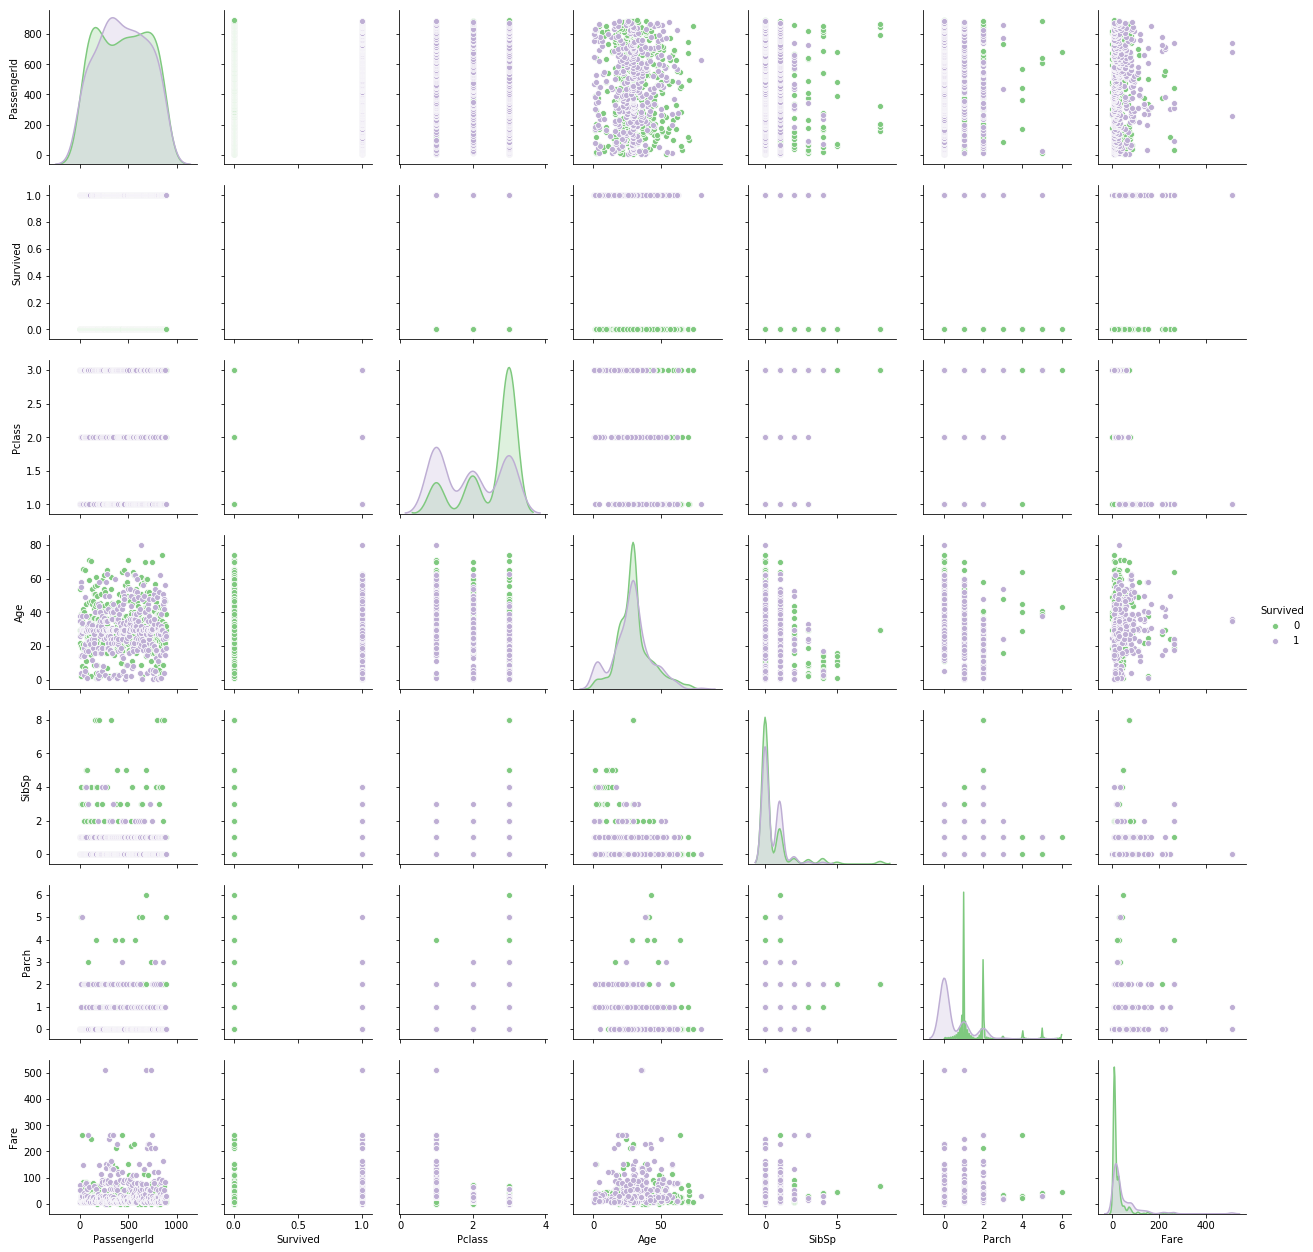

In [296]:
#数据的一些可视化操作
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.pairplot(titanic, hue = "Survived", diag_kind = "auto", kind = "scatter", palette = "Accent")



##生成7个属性的对比属性图    

%matplotlib inline目的在于实时出图

g:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


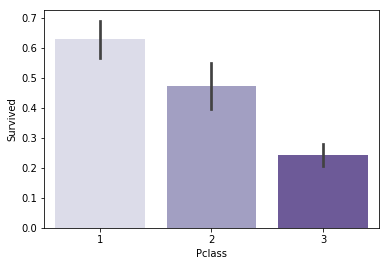

In [297]:
    sns.barplot("Pclass","Survived",data=titanic,palette="Purples")

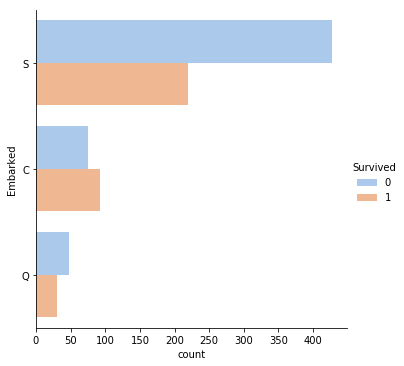

In [298]:
    sns.catplot(y ="Embarked", hue = "Survived", kind = "count", palette = "pastel", data = titanic)

g:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


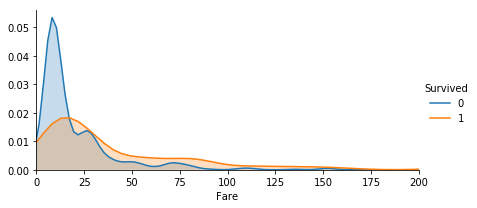

In [299]:

facet = sns.FacetGrid(titanic, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 200))
facet.add_legend()


##票价与生存率关系



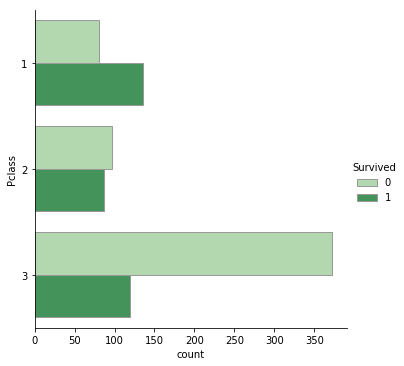

In [300]:
    #不同舱位的生存情况

sns.catplot(y="Pclass", hue="Survived", kind="count",palette="Greens", edgecolor=".6",data=titanic)

g:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


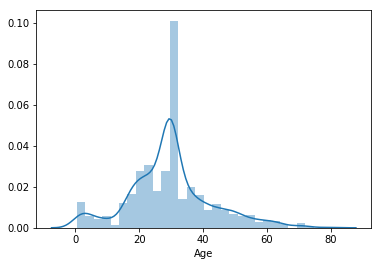

In [301]:

sns.distplot(titanic['Age'])



##进行年龄的distplot展示

直方图又称质量分布图，它是表示资料变化情况的一种主要工具。用直方图可以解析出资料的规则性，比较直观地看出产品质量特性的分布状态，对于资料分布状况一目了然，便于判断其总体质量分布情况。直方图表示通过沿数据范围形成分箱，然后绘制条以显示落入每个分箱的观测次数的数据分布。

g:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


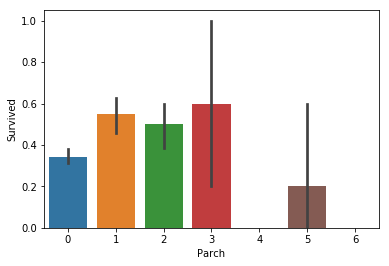

In [302]:

sns.barplot(x="Parch",y="Survived",data=titanic)


##展示携带家庭成员的生存概率


g:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


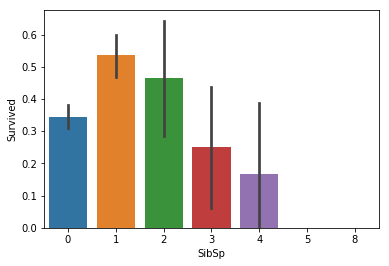

In [257]:


sns.barplot(x="SibSp",y="Survived",data=titanic)



##不同兄弟姐妹个数的生存概率
展示

g:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


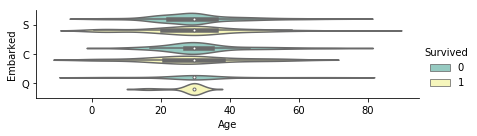

In [303]:

sns.catplot(x="Age", y="Embarked",hue="Survived", data= titanic, orient="h", height=2, aspect=3,
            palette="Set3",
            kind="violin")


In [304]:
from sklearn. pipeline import make_pipeline
from sklearn. pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier 
#from sklearn.model_selection import GridsearchCV 
from sklearn.feature_selection import SelectKBest

In [305]:
from sklearn.feature_selection import SelectKBest
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 300,
                                  max_depth = 30, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)


##训练过程


In [306]:

pipeline.fit(x_test, y_test)

g:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 10  11  12  14  15  16  19  20  22  23  24  25  27  28  29  30  31  32
  33  34  35  36  37  38  40  41  42  43  44  46  48  49  51  52  54  55
  56  58  60  61  63  66  67  68  70  71  73  75  76  77  78  80  81  82
  83  85  86  87  88  89  96  98  99 100 103 104 106 107 108 109 110 111
 112 113 114 116 117 119 120 122 124 125 126 129 130 131 132 133 134 136
 137 138 139 140 141 144 145 146 147 148 149 150 151 152 153 155 157 158
 159 160 162 163 164 165 166 168 169 170 171 172 173 174 175 177 178 179
 181 182 183 184 185 188 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 205 206 207 208 210 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 231 232 233 234 235 237 238 239 240 241 244
 245 246 247 248 249 250 252 253 254 255 256 257 258 260 261 263 264 265
 267 269 270 271 272 273 274 275 276 277 278 279 280 282 283 284 285 286
 287

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x000001E90D593488>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrea...mators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

In [309]:
x

array([[22.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [38.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [29.69911765,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [26.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [310]:

predictions = pipeline.predict(x)
submission = pd.DataFrame({"Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)

##对train.csv所有数据进行预测，并输出为submission文件

对比与原数据预测的准确率

统计结果为150个数据预测失败

741个数据预测成功

##百分比


$$
\begin{align}
\alpha =\frac{150}{891}=0.8318
\end{align}
$$


 Pipeline可以将许多算法模型串联起来，可以用于把多个estamitors级联成一个estamitor,比如将特征提取、归一化、分类组织在一起形成一个典型的机器学习问题工作流。Pipleline中最后一个之外的所有estimators都必须是变换器（transformers），最后一个estimator可以是任意类型（transformer，classifier，regresser）,如果最后一个estimator是个分类器，则整个pipeline就可以作为分类器使用，如果最后一个estimator是个聚类器，则整个pipeline就可以作为聚类器使用。

        主要带来两点好处：

        1.直接调用fit和predict方法来对pipeline中的所有算法模型进行训练和预测。

        2.可以结合grid search对参数进行选择.
